# Perceptron from Scratch

Współczesne osiągnięcia sztucznej inteligencji to w dużej mierze załuga sieci neuronowych. Najbardziej podstawową architekturą sieci neuronowej jest Perceptron wielowarstwowy (ang. Multi Layer Perceptron). Sieci neuronowe używane w profesjonalnych zastosowaniach składją się z dziesiętek lub nawet setek tysięcy neuronów. Dzisiaj przedstawię zasadę działania pojedynczego neuronu.



## Budowa perceptronu

![FeedForward](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-3-42-21-am.png)
source: https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/

## Propagacja w przód

$
\begin{align}
\quad z &= w_1x_1+w_2x_2+b \\
\quad p &= sigmoid(z) \\
\quad c &= (p-y)^2 \\
\end{align}
$

## Propagacja wstecz

$
\begin{align}
\quad w_1 &= w_1 - learning\_rate \cdot \frac{\partial c}{\partial w_1} \\
\quad w_2 &= w_2 - learning\_rate \cdot \frac{\partial c}{\partial w_2} \\
\quad b &= b - learning\_rate \cdot \frac{\partial c}{\partial b} \\
\end{align}
$

## Reguła łańcuchowa

$
\begin{align}
\quad \frac{\partial c}{\partial w_1} &= \frac{\partial c}{\partial p} \cdot \frac{\partial p}{\partial z} \cdot \frac{\partial z}{\partial w_1} \\
\quad \frac{\partial c}{\partial w_2} &= \frac{\partial c}{\partial p} \cdot \frac{\partial p}{\partial z} \cdot \frac{\partial z}{\partial w_2} \\
\quad\quad  \frac{\partial c}{\partial b} &= \frac{\partial c}{\partial p} \cdot \frac{\partial p}{\partial z} \cdot \frac{\partial z}{\partial b} \\
\end{align}
$

---

$
\quad \frac{\partial c}{\partial p} = 2(p-y) \quad 
\quad \frac{\partial p}{\partial z} = sigmoid'(z) \quad 
\quad \frac{\partial z}{\partial w_1} = x_1 \quad 
\quad \frac{\partial z}{\partial w_2} = x_2 \quad 
\quad \frac{\partial z}{\partial b} = 1 
$

---



## Funkcja Aktywacji

$
\begin{align}
\quad sigmoid(z) &= \frac{1}{1+e^{-z}} \\
\quad sigmoid'(z) &= \left( \frac{1}{1+e^{-z}} \right)' = \\
\quad &= \frac{(1)'(1+e^{-z}) - (1)(1+e^{-z})'}{(1+e^{-z})^2} = \\
\quad &= \frac{-(1+e^{-z})'}{(1+e^{-z})^2} = \\
\quad &= \frac{-(e^{-z})'}{(1+e^{-z})^2} = \\
\quad &= \frac{e^{-z}}{(1+e^{-z})^2} = \\
\quad &= \frac{e^{-z}}{(1+e^{-z})^2}
\end{align}
$



# Implementacja

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from tqdm import tqdm

class PerceptronClassifier:
    def __init__(self):
        # Losowa inicjalizacja parametrów sieci (wag)
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.b = np.random.randn()

        # Lista przechowywująca wartości funkcji kosztu
        self.cost_value_history = []

        # Te zmienne będą przechowywać dane uczące
        self.X = None
        self.Y = None

        # Learning parameters
        self.learning_rate = None
        
    def fit(self, X, Y, plot_performance=False, iterations=1000, learning_rate=0.1):
        self.X = X
        self.Y = Y
        self.learning_rate = learning_rate
        
        # Pętla ucząca
        for i in tqdm(range(iterations)):
            # Losowanie punktu treningowego
            x, y = self.random_example()
            
            # Propagacja w przód
            p, z = self.feed_forward(x)
            
            # Propagacja wstecz
            dc_dw1, dc_dw2, dc_db = self.back_propagation(x, y, z, p)
            
            # Aktualizacja wag
            self.update_wages(dc_dw1, dc_dw2, dc_db)
            
            # Funkcja kosztu
            self.calculate_total_cost_value()
            
        # Wizualizacja wydajności podczas uczenia
        if plot_performance:
            self.plot()

    def random_example(self):
        random_index = np.random.randint(len(self.X))
        return self.X[random_index], self.Y[random_index]

    def feed_forward(self, x):
        z = self.w1 * x[0] + self.w2 * x[1] + self.b
        p = self.sigmoid(z)
        return p, z 

    def back_propagation(self, x, y, z, p):
        # Pochodne pomocnicze
        dc_dp = 2 * (p - y)
        dp_dz = self.d_sigmoid(z)
        dz_dw1 = x[0]
        dz_dw2 = x[1]
        dz_db = 1

        dc_dz = dc_dp * dp_dz
        
        # Pochodne właściwe
        dc_dw1 = dc_dz * dz_dw1
        dc_dw2 = dc_dz * dz_dw2
        dc_db = dc_dz * dz_db

        return dc_dw1, dc_dw2, dc_db
    
    def update_wages(self, dc_dw1, dc_dw2, dc_db):
        self.w1 = self.w1 - self.learning_rate * dc_dw1
        self.w2 = self.w2 - self.learning_rate * dc_dw2
        self.b = self.b - self.learning_rate * dc_db
    
    def calculate_total_cost_value(self):
        total_cost_value = 0
        for j in range(len(self.X)):
            x = self.X[j]
            y = self.Y[j]
            p = self.predict(x)
            total_cost_value += self.cost_function(x, y, p)
        self.cost_value_history.append(total_cost_value)
        
    @staticmethod
    def cost_function(x, y, p):
        cost_value = np.square(p - y)
        return cost_value
    
    def predict(self, x):
        p, _ = self.feed_forward(x)
        prediction = self.threshold(p)
        return prediction
    
    @staticmethod
    def sigmoid(array):
        return 1 / (1 + np.exp(-array))

    @staticmethod
    def d_sigmoid(array):
        return np.exp(-array) / (1 + np.exp(-array)) ** 2

    @staticmethod
    def threshold(p):
        prediction = np.where(p >= 0.5, 1, 0)
        return prediction

    def plot(self):
        plt.figure(figsize=(8, 5))
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.plot(self.cost_value_history)
        plt.show()

# Trenowanie i Testowanie

## Ładowanie danych

In [2]:
np.random.seed(2)
features_array, target_array = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)

## Wizualizcja zbioru uczącego

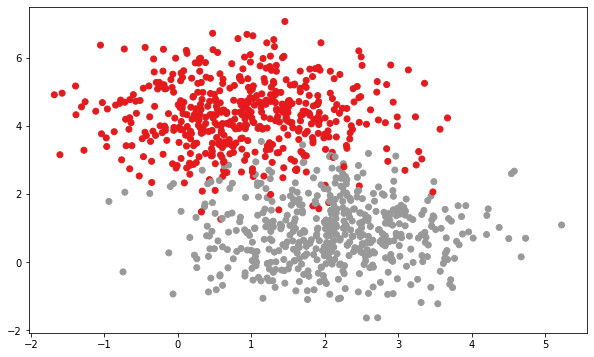

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(features_array[:, 0], features_array[:, 1], c=target_array, cmap=plt.get_cmap("Set1"))
plt.show()

## Trenowanie perceptronu

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 800/800 [00:07<00:00, 104.51it/s]


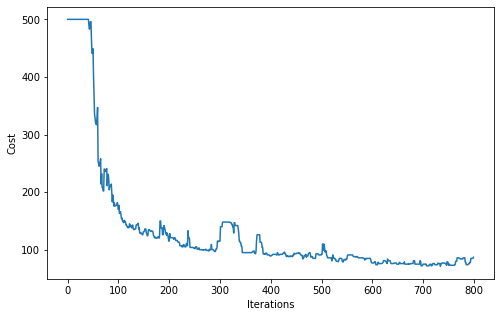

In [4]:
np.random.seed(2)
pc = PerceptronClassifier()
pc.fit(X=features_array, Y=target_array, plot_performance=True, iterations=800)

## Wizualizacja wyników klasyfikacji

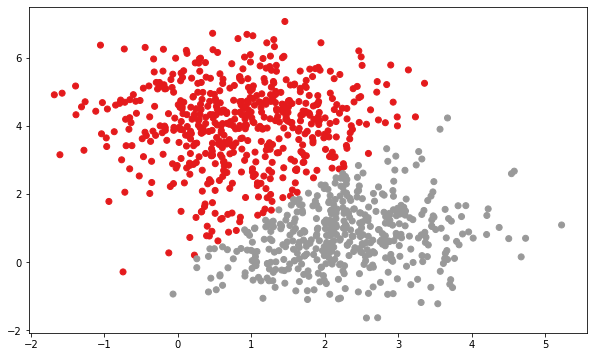

In [5]:
my_prediction_array = np.array([pc.predict((x_1, x_2)) for x_1, x_2 in features_array])
plt.figure(figsize=(10,6))
plt.scatter(features_array[:, 0], features_array[:, 1], c=my_prediction_array.ravel(), cmap=plt.get_cmap("Set1"))
plt.show()

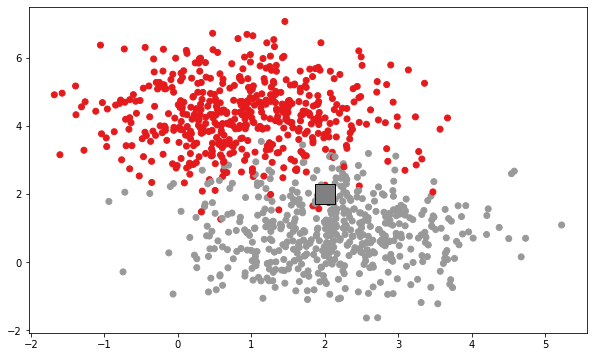

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(features_array[:, 0], features_array[:, 1], c=target_array, cmap=plt.get_cmap("Set1"))

my_point = (2, 2)
my_prediction = pc.predict(my_point)
my_prediction_col = 'gray' if my_prediction.item() > 0.5 else 'red'

plt.scatter([my_point[0]], [my_point[1]],
            c=my_prediction_col,
            edgecolor='k',
            marker='s',
            s=400)
plt.show()

## Mierzenie wydajności (accuracy)

In [7]:
my_prediction_array = np.array([pc.predict((x, y)) for x, y in features_array])
results = (my_prediction_array == target_array)
results.mean()*100

91.3